<a href="https://colab.research.google.com/github/Simranpreet-Singh-TIET/Parameter-Optimization-of-SVM/blob/main/102003485.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler


In [42]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header= None)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
df.columns= ['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','class']

In [45]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
df.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [47]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
dummies = pd.get_dummies(df.workclass, drop_first= False)
df = pd.concat([dummies, df], axis='columns')
df.drop(['workclass',' Private'], axis='columns', inplace= True)

dummies = pd.get_dummies(df.education, drop_first= False)
df = pd.concat([dummies, df], axis='columns')
df.drop(['education',' Bachelors'], axis='columns', inplace= True)

dummies = pd.get_dummies(df.maritalstatus, drop_first= False)
df = pd.concat([dummies, df], axis='columns')
df.drop(['maritalstatus',' Divorced'], axis='columns', inplace= True)

dummies = pd.get_dummies(df.occupation, drop_first= False)
df = pd.concat([dummies, df], axis='columns')
df.drop(['occupation',' Other-service'], axis='columns', inplace= True)

dummies = pd.get_dummies(df.relationship, drop_first= False)
df = pd.concat([dummies, df], axis='columns')
df.drop(['relationship',' Husband'], axis='columns', inplace= True)

dummies = pd.get_dummies(df.race, drop_first= False)
df = pd.concat([dummies, df], axis='columns')
df.drop(['race',' White'], axis='columns', inplace= True)

dummies = pd.get_dummies(df.sex, drop_first= False)
df = pd.concat([dummies, df], axis='columns')
df.drop(['sex',' Male'], axis='columns', inplace= True)

dummies = pd.get_dummies(df.nativecountry, drop_first= False)
df = pd.concat([dummies, df], axis='columns')
df.drop(['nativecountry',' United-States'], axis='columns', inplace= True)

print(df)
#workcalss,education,martital status,occupation,relationship,race,sex,native-country
# Concatenate the dummies to original dataframe


        ?   Cambodia   Canada   China   Columbia   Cuba   Dominican-Republic  \
0       0          0        0       0          0      0                    0   
1       0          0        0       0          0      0                    0   
2       0          0        0       0          0      0                    0   
3       0          0        0       0          0      0                    0   
4       0          0        0       0          0      1                    0   
...    ..        ...      ...     ...        ...    ...                  ...   
32556   0          0        0       0          0      0                    0   
32557   0          0        0       0          0      0                    0   
32558   0          0        0       0          0      0                    0   
32559   0          0        0       0          0      0                    0   
32560   0          0        0       0          0      0                    0   

        Ecuador   El-Salvador   England

In [49]:
scaler = StandardScaler()
numerical_cols = ['age', 'fnlwgt', 'educationnum','capitalgain','capitalloss','hoursperweek']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [50]:
df

,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Self-emp-not-inc,State-gov,Without-pay,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,class
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,<=50K
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,<=50K
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,<=50K
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,<=50K
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,<=50K
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,>50K
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,<=50K
32559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,<=50K


In [51]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:7000, :-1], df.iloc[:7000, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [52]:
samples

[(       ?   Cambodia   Canada   China   Columbia   Cuba   Dominican-Republic  \
  5338   0          0        0       0          0      0                    0   
  5666   0          0        0       0          0      0                    0   
  3083   0          0        0       0          0      0                    0   
  3452   0          0        0       0          0      0                    0   
  6903   0          0        0       0          0      0                    0   
  ...   ..        ...      ...     ...        ...    ...                  ...   
  3500   0          0        0       0          0      0                    0   
  1625   0          0        0       0          0      0                    0   
  1600   0          0        0       0          0      0                    0   
  6115   0          0        0       0          0      0                    0   
  3822   0          0        0       0          0      0                    0   
  
         Ecuador   El-Sal

In [53]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 
    

In [55]:
# divide dataset into training and testing sets with 10 different samples


nsamples = 10
accuracies = []
params= []
iteration= 150

kernelList = ['linear', 'rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")

Iterating on sample  1
iteration  1
sigmoid 8.570816576633312 1.3973140263763928
fit
iteration  2
sigmoid 8.885037045006012 2.2789152666220156
fit
iteration  3
rbf 8.753595500534622 7.5344586217618446
fit
iteration  4
sigmoid 5.1140302308518715 1.300636516338184
fit
iteration  5
rbf 1.9755147334761458 2.0568181273639508
fit
iteration  6
linear 0.7575762265321551 5.5426420384326525
fit
iteration  7
linear 8.295886737475795 7.200473595014075
fit
iteration  8
linear 3.359438520108202 1.5301865455179242
fit
iteration  9
linear 1.146294283451531 2.679765073632072
fit
iteration  10
rbf 3.0136216637423727 6.497866298516484
fit
iteration  11
rbf 3.009800236528064 4.221969585498123
fit
iteration  12
sigmoid 6.432296919355771 6.574108204478481
fit
iteration  13
linear 3.0575119332454035 4.306187126213933
fit
iteration  14
rbf 9.836749642875718 0.008952777937198952
fit
iteration  15
sigmoid 4.647486013643205 9.45701838086716
fit
iteration  16
rbf 7.959051905345088 1.3247700615723024
fit
iteration

In [56]:
print(df_sample)

   sample#  best accuracy         c     gamma  kernel
0        1          83.71  9.836750  0.008953     rbf
1        2          85.43  5.166027  0.067586     rbf
2        3          84.29  5.011507  0.135762     rbf
3        4          85.24  2.148797  7.096241  linear
4        5          84.62  0.243317  2.537431  linear
5        6          84.86  0.288139  9.189963  linear
6        7          85.62  6.596029  0.059894     rbf
7        8          85.90  3.375117  4.750077  linear
8        9          84.71  0.084487  5.802712  linear
9       10          84.57  1.738627  0.180015     rbf


In [57]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]


In [58]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [59]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

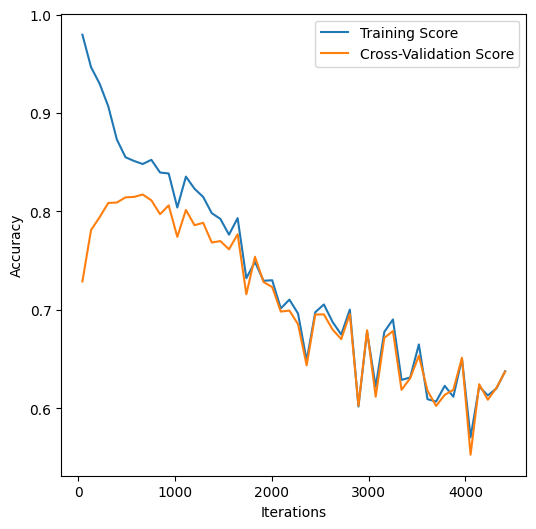

In [61]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()